***************** Data Summary ************************
Head of the DataFrame:
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

Tail of the DataFrame:
     Survived  Pclass     Sex   Age  SibSp  Parch   Fare Embarked
886         0       2    male  27.0      0      0  13.00        S
887         1       1  female  19.0      0      0  30.00        S
888         0       3  female   NaN      1      2  23.45        S
889         1       1    male  26.0      0      0  30.00        C
890         0       3    male  32.0      0      0   7.75        Q

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (to

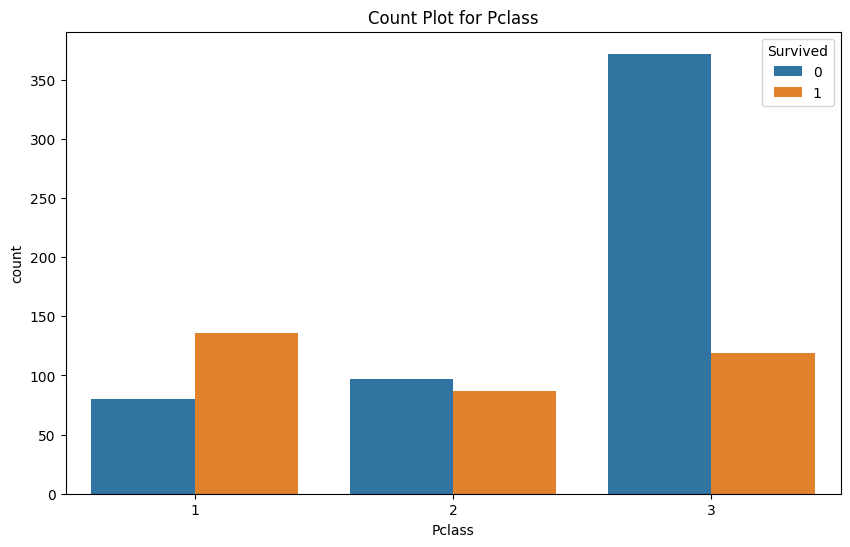

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
****************************************
Sex             F          M
Pclass                      
1       34.141405  39.287717
2       28.748661  30.653908
3       24.068493  27.372153


In [7]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


def read_data(file_path, file_format='csv'):
    """
    Read data from different file formats such as CSV, Excel, or JSON.

    Parameters:
    - file_path (str): The path to the file.
    - file_format (str): The format of the file (default is 'csv').

    Returns:
    - pd.DataFrame: The loaded dataset.
    """
    supported_formats = ['csv', 'excel', 'json']
    if file_format.lower() not in supported_formats:
        raise ValueError(f"Unsupported file format. Supported formats: {', '.join(supported_formats)}.")

    if file_format == 'csv':
        return pd.read_csv(file_path)
    elif file_format == 'excel':
        return pd.read_excel(file_path)
    elif file_format == 'json':
        return pd.read_json(file_path)

    
    
def check_missing_values(data):
    """
    Check for missing values in the dataset.

    Parameters:
    - data (pd.DataFrame): The input dataset.

    Returns:
    - pd.Series: A Series indicating the count of missing values for each column.
    """
    missing_values = data.isnull().sum()
    return missing_values[missing_values > 0]





def data_summary(data):
    """
    Generate key statistical summaries of the data.

    Parameters:
    - data (pd.DataFrame): The input dataset.

    Returns:
    - None: Prints key statistical summaries.
    """
    print("Head of the DataFrame:")
    print(data.head())

    print("\nTail of the DataFrame:")
    print(data.tail())

    print("\nDataFrame Info:")
    print(data.info())

    print("\nDataFrame Descriptive Statistics:")
    print(data.describe())

    print("\nDataFrame Columns:")
    print(data.columns)

    print("\nDataFrame Shape:")
    print(data.shape)

def encode_categorical_data(data, columns_to_encode):
    """
    Encode categorical data into numerical formats.

    Parameters:
    - data (pd.DataFrame): The input dataset.
    - columns_to_encode (list): List of columns containing categorical data.

    Returns:
    - pd.DataFrame: The dataset with encoded categorical columns.
    """
    le = LabelEncoder()
    for column in columns_to_encode:
        data[column + '_encoded'] = le.fit_transform(data[column])
    return data.drop(columns=columns_to_encode)

def handle_missing_values(data, strategy='mean'):
    """
    Handle missing values in the dataset.

    Parameters:
    - data (pd.DataFrame): The input dataset.
    - strategy (str): The imputation strategy (default is 'mean').

    Returns:
    - pd.DataFrame: The dataset with missing values handled.
    """
    numeric_columns = data.select_dtypes(include=['number']).columns
    non_numeric_columns = list(set(data.columns) - set(numeric_columns))

    if strategy == 'mean':
        data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
    elif strategy == 'median':
        data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())
    elif strategy == 'mode':
        data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mode().iloc[0])
    # Add more strategies as needed
    else:
        raise ValueError("Unsupported imputation strategy.")

    # Handle non-numeric columns separately
    data[non_numeric_columns] = data[non_numeric_columns].fillna(data[non_numeric_columns].mode().iloc[0])

    return data




def drop_columns(data, columns_to_drop):
    """
    Drop specified columns from the dataset.

    Parameters:
    - data (pd.DataFrame): The input dataset.
    - columns_to_drop (list): List of columns to be dropped.

    Returns:
    - pd.DataFrame: The dataset with specified columns removed.
    """
    return data.drop(columns=columns_to_drop, errors='ignore')
        

    
    
def sort_values(data, column, ascending=True):
    """
    Sort the dataset based on a specific column.

    Parameters:
    - data (pd.DataFrame): The input dataset.
    - column (str): The column to sort the data by.
    - ascending (bool): Whether to sort in ascending order (default is True).

    Returns:
    - pd.DataFrame: The dataset sorted based on the specified column.
    """
    return data.sort_values(by=column, ascending=ascending)

def replace_values(data, column, old_value, new_value):
    """
    Replace values in a specific column.

    Parameters:
    - data (pd.DataFrame): The input dataset.
    - column (str): The column where values will be replaced.
    - old_value: The value to be replaced.
    - new_value: The new value to replace old_value with.

    Returns:
    - pd.DataFrame: The dataset with replaced values.
    """
    data[column] = data[column].replace(old_value, new_value)
    return data

def generate_countplot(data, column, hue=None):
    """
    Generate a count plot for a categorical column.

    Parameters:
    - data (pd.DataFrame): The input dataset.
    - column (str): The categorical column for the count plot.
    - hue (str): Optional parameter for grouping by another categorical column (default is None).

    Returns:
    - None: Displays the count plot.
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column, hue=hue)
    plt.title(f'Count Plot for {column}')
    plt.show()

def create_crosstab(data, index_column, columns_column):
    """
    Create a cross-tabulation (contingency table) between two categorical columns.

    Parameters:
    - data (pd.DataFrame): The input dataset.
    - index_column (str): The column to be used as the index in the crosstab.
    - columns_column (str): The column to be used as the columns in the crosstab.

    Returns:
    - pd.DataFrame: The cross-tabulation table.
    """
    return pd.crosstab(data[index_column], data[columns_column])

def create_pivot_table(data, index, columns, values, aggfunc=np.mean):
    """
    Create a pivot table from the dataset.

    Parameters:
    - data (pd.DataFrame): The input dataset.
    - index (str or list): The column(s) to be used as the index in the pivot table.
    - columns (str or list): The column(s) to be used as the columns in the pivot table.
    - values (str): The column to be used as the values in the pivot table.
    - aggfunc: Aggregation function to apply (default is np.mean).

    Returns:
    - pd.DataFrame: The pivot table.
    """
    return pd.pivot_table(data, index=index, columns=columns, values=values, aggfunc=aggfunc)


def map_function(data, column, mapping_dict):
    """
    Map values in a specific column using a mapping dictionary.

    Parameters:
    - data (pd.DataFrame): The input dataset.
    - column (str): The column where values will be mapped.
    - mapping_dict (dict): The mapping dictionary for values.

    Returns:
    - pd.DataFrame: The dataset with mapped values in the new column.
    """
    data[column + '_mapped'] = data[column].map(mapping_dict)
    return data

def apply_function(data, column, custom_function):
    """
    Apply a custom function element-wise to a specific column.

    Parameters:
    - data (pd.DataFrame): The input dataset.
    - column (str): The column where the custom function will be applied.
    - custom_function (callable): The custom function to be applied.

    Returns:
    - pd.DataFrame: The dataset with the result of the custom function in the new column.
    """
    data[column + '_applied'] = data[column].apply(custom_function)
    return data



# Example usage:
file_path = 'train.csv'
data_format = 'csv'
df = read_data(file_path, file_format=data_format)

columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df = drop_columns(df, columns_to_drop)

print("***************** Data Summary ************************")
data_summary(df)

# Handle missing values
df = handle_missing_values(df)


# Map values in the 'Embarked' column using a mapping dictionary
embarked_mapping = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
df = map_function(df, column='Embarked', mapping_dict=embarked_mapping)
print(df.head())
# Apply a custom function to the 'Age' column (for demonstration purposes, using a simple function)
def custom_age_function(age):
    return 'Young' if age < 30 else 'Old'

df = apply_function(df, column='Age', custom_function=custom_age_function)

print(df.head())

# Encode categorical data
categorical_columns_to_encode = ['Embarked']
df = encode_categorical_data(df, columns_to_encode=categorical_columns_to_encode)

print("\n***************** Updated DataFrame ************************")
# Example usage:
missing_values_summary = check_missing_values(df)
print("Missing Values Summary:")
print(missing_values_summary)


# Sort the DataFrame by 'Age' column in descending order
sorted_df = sort_values(df, column='Age', ascending=False)

# Replace values in the 'Sex' column
df = replace_values(df, column='Sex', old_value=['male','female'], new_value=['M','F'])


print(df)
# Generate a count plot for the 'Pclass' column
generate_countplot(df, column='Pclass', hue='Survived')
plt.show()
# Create a cross-tabulation table between 'Pclass' and 'Survived'
crosstab_result = create_crosstab(df, index_column='Pclass', columns_column='Survived')
print(crosstab_result)
print("****************************************")
# Create a pivot table for 'Pclass' and 'Sex' with 'Age' as values using the mean
pivot_table_result = create_pivot_table(df, index=['Pclass'], columns=['Sex'], values='Age', aggfunc=np.mean)
print(pivot_table_result)

In [6]:
import os 
os.chdir(r'E:\before machine\pandas  Crash Course\pythonProject2\titanic')